In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mooc-data-xuetangx/user_info (1).csv
/kaggle/input/mooc-data-xuetangx/Train.csv
/kaggle/input/mooc-data-xuetangx/Test.csv


In [2]:
data_train=pd.read_csv('/kaggle/input/mooc-data-xuetangx/Train.csv')
data_test=pd.read_csv('/kaggle/input/mooc-data-xuetangx/Test.csv')
user_profile=pd.read_csv('/kaggle/input/mooc-data-xuetangx/user_info (1).csv')

In [3]:
df=pd.concat([data_train,data_test])
df

,username,course_id,session_id,truth,action_click_about,action_click_courseware,action_click_forum,action_click_info,action_click_progress,action_close_courseware,...,action_problem_check_incorrect,action_problem_get,action_problem_save,action_reset_problem,action_seek_video,action_stop_video,unique_session_count,avg_nActions_per_session,timestamp,time_difference
0,5,TsinghuaX/60510102X/_,c4d05fdd4af11ea45bb4623b2b6fa2c4c4d05fdd4af11e...,1,0,0,0,0,0,1,...,0,0,0,0,7,0,1,11.0,15891279255,10468.0
1,5,TsinghuaX/70240183x/2015_T2,6ff66b03510e0dc515ea4637216f1ad36ff66b03510e0d...,1,0,0,0,0,0,3,...,0,1,0,0,19,3,1,43.0,62075438024,14146.0
2,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbafc145c0c98fd5a1...,1,0,0,0,0,0,9,...,0,0,0,0,0,2,2,29.5,85396836502,4053130.0
3,5,TsinghuaX/80515522X/2015_T1,c4d05fdd4af11ea45bb4623b2b6fa2c4c4d05fdd4af11e...,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,3.0,4333944105,3272.0
4,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f59f58bc2bc80c3...,0,4,6,0,2,0,3,...,0,0,0,0,2,0,2,13.5,39059366333,2112407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44924,6899968,course-v1:TsinghuaX+80512073X+2017-T1,132417c489c665e04c228b056fbbce00132417c489c665...,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,2.0,2982078106,60.0
44925,6937204,course-v1:TsinghuaX+80000271X+2017_T1,e8f8f1e1a27cc4bec129e1a5519eb73ee8f8f1e1a27cc4...,1,4,24,0,4,0,12,...,1,4,0,0,11,7,1,160.0,238720827574,18229.0
44926,6937691,course-v1:TsinghuaX+20320074X+2017_T1,5ebd9c7aea34979adeffe48c746009475ebd9c7aea3497...,1,4,3,0,0,0,2,...,0,0,0,0,0,1,1,27.0,40329053144,545780.0
44927,6937691,course-v1:TsinghuaX+AP000008X+2017T1,5ebd9c7aea34979adeffe48c746009475ebd9c7aea3497...,1,0,1,0,0,0,1,...,0,0,0,0,0,1,1,6.0,8962439786,4.0


In [4]:
user_profile=user_profile.rename(columns={"user_id": "username"})
user_profile

,username,gender,education,birth
0,631,male,High,1997.0
1,2631,male,Bachelor's,1990.0
2,4231,male,Associate,1991.0
3,6031,male,Bachelor's,1988.0
4,7831,NaN,NaN,NaN
...,...,...,...,...
9627143,10435606,NaN,NaN,NaN
9627144,10437206,NaN,NaN,NaN
9627145,10438806,NaN,NaN,NaN
9627146,10440406,NaN,NaN,NaN


In [5]:
df=df.merge(user_profile)
df['age']=2016-df['birth']
df.drop('birth',axis=1,inplace=True)

In [6]:
user_enroll_num = df.groupby('username').count()[['course_id']]
user_enroll_num.columns = ['user_enroll_num']
user_enroll_num

,user_enroll_num
username,
5,12
7,2
26,7
32,3
35,3
...,...
7011178,1
7019483,1
7023562,1


In [7]:
df=df.merge(user_enroll_num,left_on='username',right_index=True)
df

,username,course_id,session_id,truth,action_click_about,action_click_courseware,action_click_forum,action_click_info,action_click_progress,action_close_courseware,...,action_seek_video,action_stop_video,unique_session_count,avg_nActions_per_session,timestamp,time_difference,gender,education,age,user_enroll_num
0,5,TsinghuaX/60510102X/_,c4d05fdd4af11ea45bb4623b2b6fa2c4c4d05fdd4af11e...,1,0,0,0,0,0,1,...,7,0,1,11.0,15891279255,10468.0,male,Doctorate,31.0,12
1,5,TsinghuaX/70240183x/2015_T2,6ff66b03510e0dc515ea4637216f1ad36ff66b03510e0d...,1,0,0,0,0,0,3,...,19,3,1,43.0,62075438024,14146.0,male,Doctorate,31.0,12
2,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbafc145c0c98fd5a1...,1,0,0,0,0,0,9,...,0,2,2,29.5,85396836502,4053130.0,male,Doctorate,31.0,12
3,5,TsinghuaX/80515522X/2015_T1,c4d05fdd4af11ea45bb4623b2b6fa2c4c4d05fdd4af11e...,0,0,0,0,0,0,1,...,0,0,1,3.0,4333944105,3272.0,male,Doctorate,31.0,12
4,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f59f58bc2bc80c3...,0,4,6,0,2,0,3,...,2,0,2,13.5,39059366333,2112407.0,male,Doctorate,31.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225637,6899968,course-v1:TsinghuaX+80512073X+2017-T1,132417c489c665e04c228b056fbbce00132417c489c665...,1,0,0,0,0,0,0,...,0,0,1,2.0,2982078106,60.0,NaN,NaN,NaN,1
225638,6937204,course-v1:TsinghuaX+80000271X+2017_T1,e8f8f1e1a27cc4bec129e1a5519eb73ee8f8f1e1a27cc4...,1,4,24,0,4,0,12,...,11,7,1,160.0,238720827574,18229.0,NaN,NaN,NaN,1
225639,6937691,course-v1:TsinghuaX+20320074X+2017_T1,5ebd9c7aea34979adeffe48c746009475ebd9c7aea3497...,1,4,3,0,0,0,2,...,0,1,1,27.0,40329053144,545780.0,NaN,NaN,NaN,2
225640,6937691,course-v1:TsinghuaX+AP000008X+2017T1,5ebd9c7aea34979adeffe48c746009475ebd9c7aea3497...,1,0,1,0,0,0,1,...,0,1,1,6.0,8962439786,4.0,NaN,NaN,NaN,2


In [8]:
df.isna().sum()/len(df)

username                          0.000000
course_id                         0.000000
session_id                        0.000000
truth                             0.000000
action_click_about                0.000000
action_click_courseware           0.000000
action_click_forum                0.000000
action_click_info                 0.000000
action_click_progress             0.000000
action_close_courseware           0.000000
action_close_forum                0.000000
action_create_comment             0.000000
action_create_thread              0.000000
action_delete_comment             0.000000
action_delete_thread              0.000000
action_load_video                 0.000000
action_pause_video                0.000000
action_play_video                 0.000000
action_problem_check              0.000000
action_problem_check_correct      0.000000
action_problem_check_incorrect    0.000000
action_problem_get                0.000000
action_problem_save               0.000000
action_rese

In [9]:
df.drop(['gender','education','age'],axis=1,inplace=True)

In [10]:
# df.groupby('education')['age'].mean()

In [11]:
# df['age'].median()

In [12]:
# def impute_age(cols):
#     Age = cols[0]
#     education = cols[1]
    
#     if pd.isnull(Age):

#         if education == 'Associate':
#             return 32
#         elif education == "Bachelor's":
#             return 26
#         elif education in['Doctorate',"Master's"]:
#             return 31
#         elif education =='Primary':
#             return 30
#         elif education in ["High","Middle"]:
#             return 21

#         else:
#             return 25
        
#     else:
#         return Age

In [13]:
from sklearn.model_selection import train_test_split


# Custom splitting function
def custom_train_test_split(data, test_size=0.2, random_state=None):
    unique_usernames = data['username'].unique()

    train_usernames, test_usernames = train_test_split(unique_usernames, test_size=test_size, random_state=random_state)

    train_data = data[(data['username'].isin(train_usernames))]
    test_data = data[(data['username'].isin(test_usernames))]

    return train_data, test_data

# Split the data
train_data, test_data = custom_train_test_split(df, test_size=0.2, random_state=42)



In [14]:
train_data.drop(['username','course_id','session_id'],axis=1,inplace=True)
test_data.drop(['username','course_id','session_id'],axis=1,inplace=True)

/tmp/ipykernel_20/1618927226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['username','course_id','session_id'],axis=1,inplace=True)
/tmp/ipykernel_20/1618927226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['username','course_id','session_id'],axis=1,inplace=True)


In [15]:
from catboost import CatBoostClassifier

x_train,y_train=train_data.drop('truth',axis=1),train_data['truth']
X_test,y_test=test_data.drop('truth',axis=1),test_data['truth']

In [16]:
from catboost import CatBoostClassifier

x_train,y_train=train_data.drop('truth',axis=1),train_data['truth']
model = CatBoostClassifier(iterations=1000)



In [17]:
model.fit(x_train,
          y_train,
          verbose=False)


Accuracy: 0.84
Precision: 0.86
Recall: 0.95
F1 Score: 0.90
ROC AUC: 0.85
Confusion Matrix:
[[ 5856  5289]
 [ 1836 32570]]


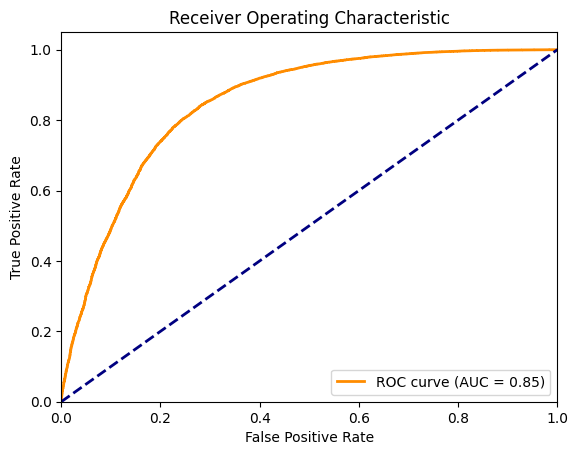

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier



# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
